In [18]:
#import needed libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import kaggle

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [19]:
#load in the dataset onto jupyter 
df = pd.read_csv("winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [20]:
df.isna()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False


In [21]:
df.duplicated()

0       False
1       False
2       False
3       False
4        True
        ...  
1594    False
1595    False
1596     True
1597    False
1598    False
Length: 1599, dtype: bool

In [22]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Text(0, 0.5, 'Quality Rating')

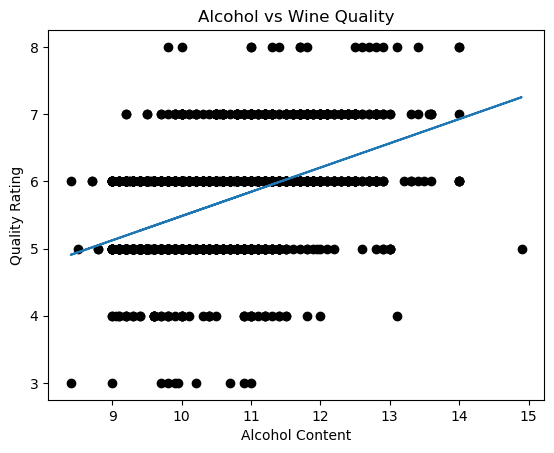

In [55]:
#defining the two X and Y variables that I want to see the relationship between
X = df[["alcohol"]]
Y = df[["quality"]]
x = df["alcohol"]
y = df['quality']

fig = plt.figure()
ax = plt.subplot()

ax.scatter(x,y , color="black")

m,b = np.polyfit(x,y, 1)
ax.plot(x, m*x + b)
ax.set_title("Alcohol vs Wine Quality")
ax.set_xlabel('Alcohol Content')
ax.set_ylabel('Quality Rating')


In [56]:
#split data into test and train data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

#this creates an (X,Y) training set and a (X,Y) testing set and the test size is 0.2 and the training becomes rest 

In [57]:
#here, i am creating an instance model 
model = LinearRegression()
#fitting the model to your data
model.fit(X_train,Y_train)


LinearRegression()

In [58]:
model.coef_
model.intercept_


array([1.8492942])

In [62]:
new_wine = pd.DataFrame({
    "alcohol": [11.5]
})

prediction = model.predict(new_wine)
print(prediction)


[[6.01591318]]


In [64]:
r_2 = r2_score(Y_test, Y_pred)
print ("R^2 =", r_2)

R^2 = 0.23561797203963364


In [65]:
mse = mean_squared_error(Y_test, Y_pred)
print ("MSE =", mse)

MSE = 0.4995281340730445
